<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

PRACTICE LAB - SESSION 9 - Recurrent Neural Network

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>


# Agenda



*   Simple RNN for forecasting



# RNN in Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.random import set_seed

# Excercise: Forecasting


![Forecasting Time Series](https://i.imgur.com/m88ihrK.png)

In [ ]:
# cột x time step 

## 1 Step Ahead

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Functions to generate fake time series**


In [ ]:
def generate_time_series(batch_size, n_steps):
  np.random.seed(42)

  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  # wave 1
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) 
  # wave 2
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
  # noise
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
  return series[..., np.newaxis].astype(np.float32)

def create_data_set(batch_size, n_steps, predict_steps, test_size):
  
  series = generate_time_series(batch_size, n_steps + predict_steps) 

  test_start = batch_size - test_size
  X_test = series[test_start:, :n_steps]
  y_test = series[test_start:, n_steps:]

  val_start = test_start - test_size
  X_val = series[val_start:test_start, :n_steps]
  y_val = series[val_start:test_start, n_steps:]

  X_train = series[:val_start, :n_steps]
  y_train = series[:val_start, n_steps:]
  
  return X_train, y_train, X_val, y_val, X_test, y_test

**How does data look like**

(10000, 50, 1)


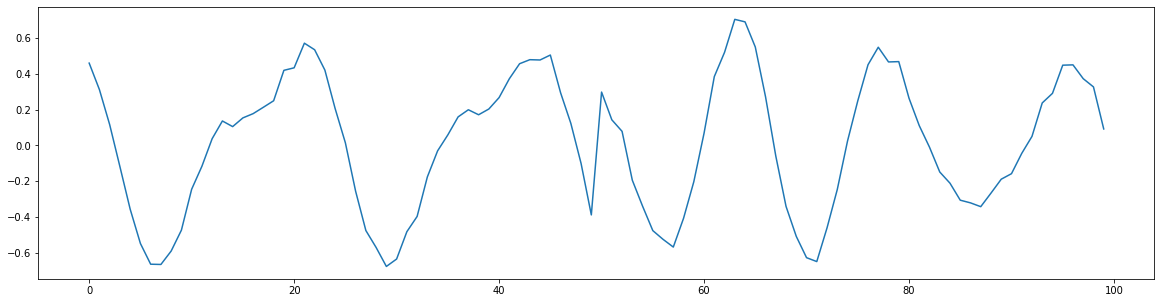

In [ ]:
series = generate_time_series(10000, 50)
print(series.shape)
series=series.reshape(500000,1)
plt.figure(figsize=(20,5))
plt.plot(list(range(100)),np.squeeze(series[:100]))

**Create Train, Validation, Test data**

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = create_data_set(10000, 50, 1, 1000)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)
# 8000 sample, 50 step , 1 gia tri

(8000, 50, 1) (8000, 1, 1)
(1000, 50, 1) (1000, 1, 1)
(1000, 50, 1) (1000, 1, 1)


### Visualize Series

In [ ]:
def plot_series(series, n_steps, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series)
    if y is not None:
        plt.plot(n_steps, y, "gx", markersize=10)# gx : green, vẽ dấu x
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro") #red , vẽ dấu o
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

def plot_all_series(rows, cols, X, y_true, y_pred=None):
  fig, axes = plt.subplots(nrows=rows, ncols=cols, sharey=True, figsize=(cols*4, rows*2))
  for row in range(rows):
    for col in range(cols):
        plt.sca(axes[row][col])
        if y_pred is not None:
          plot_series(X_test[row * 10 + col, :, 0], 50, y_test[row * 10 + col, 0],
                y_pred[row * 10 + col, 0], y_label=("$x(t)$" if col==0 else None))
        else:
          plot_series(X_test[row * 10 + col, :, 0], 50, y_test[row * 10 + col, 0],
                  y_label=("$x(t)$" if col==0 else None))
  plt.show()

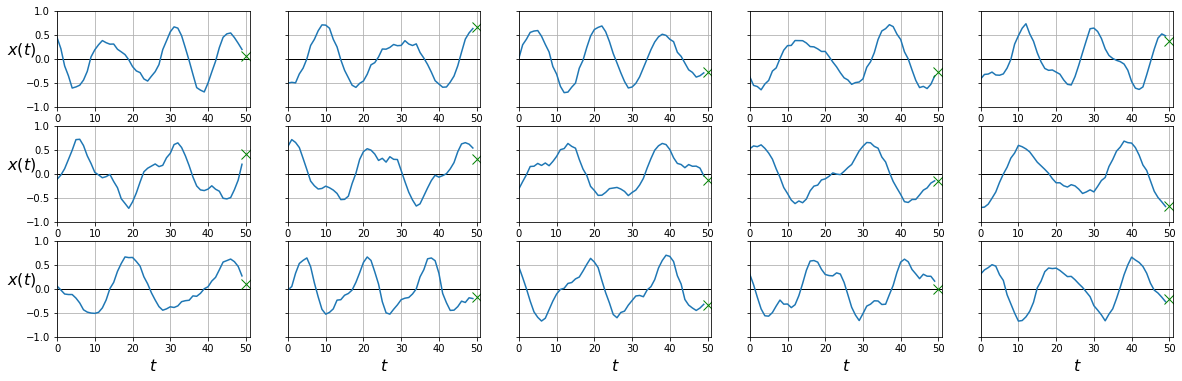

In [ ]:
plot_all_series(3, 5, X_test, y_test)

In [ ]:
# TODOs
# 1. Complete the function below

def plot_learning_curves(history):
  plt.figure(figsize = (10,10))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss vs Epochs')
  plt.legend(['Train Loss','Val Loss'])
  plt.show()

### Linear Regression

In [ ]:
# TODOs
# 1. Implement and train a Simple Linear Regression model using Tensorflow 2
set_seed(42)
model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(20,activation = 'relu'))
model.add(Dense(20,activation = 'relu'))
# model.add(Dense(20,activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mse',optimizer = 'adam')
history = model.fit(X_train,y_train,epochs = 20,verbose = 1,validation_data = (X_val,y_val))

Epoch 1/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0470 - val_loss: 0.0154
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0072
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 8/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 9/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 10/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0032

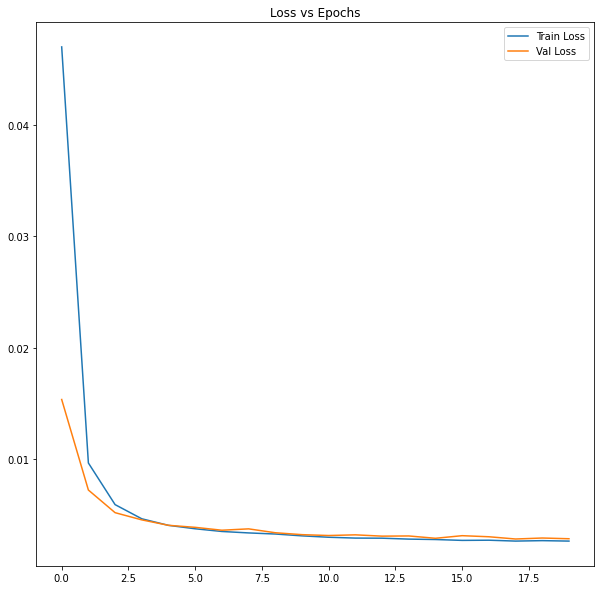

32/32 [==============================] - 0s 1ms/step - loss: 0.0029


0.00292878202162683

In [ ]:
# TODOs
# 1. Plot Learning Curve
# 2. Evaluate on Test Set
plot_learning_curves(history)
model.evaluate(X_test,y_test)

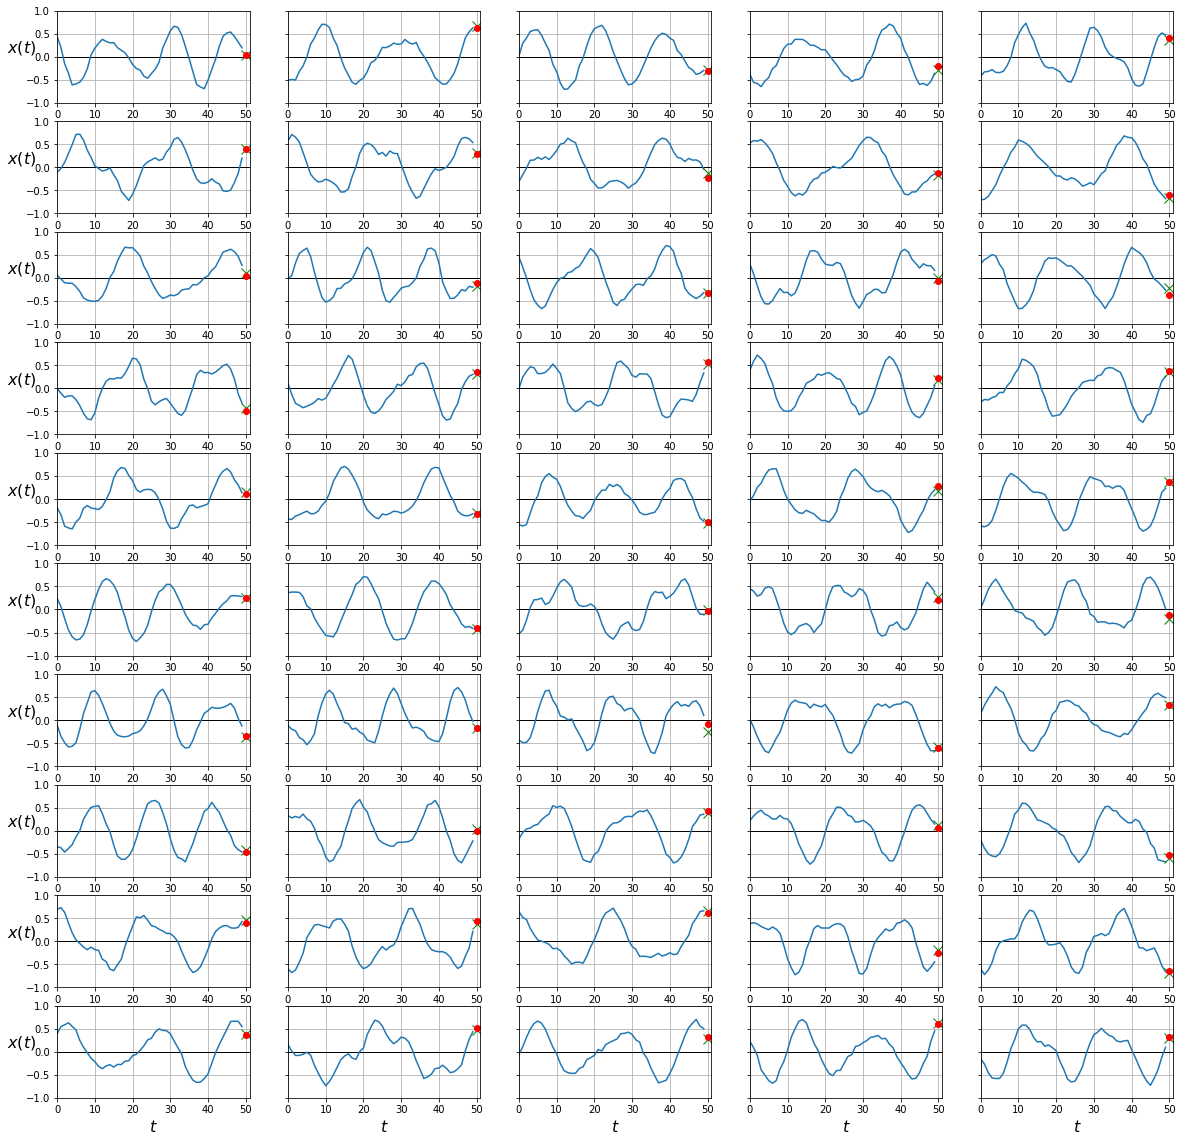

In [ ]:
# TODOs
# 1. Make a prediction
y_pred = model.predict(X_test)
# xem scale của output từ đó đánh giá loss 

plot_all_series(10, 5, X_test, y_test, y_pred)

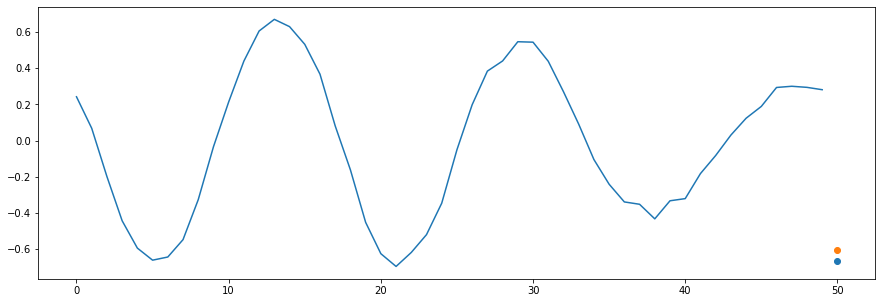

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(range(50),X_test[50])
plt.scatter(50,y_test[14])
plt.scatter(50,y_pred[14])

### 1 Layer RNN

**TODOs**
1. Implement and train a 1 layer RNN model using Tensorflow 2
1. Plot Learning Curve
2. Evaluate on Test Set
1. Make a prediction
1. Call plot_all_serires()
1. Change to ``n`` layer RNN, each has 20 units


In [ ]:
rnn_model = Sequential()
# De stack them mot SimpleRNN phai them return_sequences = True
rnn_model.add(SimpleRNN(20,input_shape= X_train.shape[1:],return_sequences=True))
rnn_model.add(SimpleRNN(20))
rnn_model.add(Dense(1))
rnn_model.compile(loss = 'mse', optimizer = 'adam')
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 1,461
Trainable params: 1,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rnn_history = rnn_model.fit(X_train,y_train,epochs = 20, verbose = 1, validation_data=(X_val,y_val))

Epoch 1/20
250/250 [==============================] - 10s 41ms/step - loss: 0.0221 - val_loss: 0.0047
Epoch 2/20
250/250 [==============================] - 10s 40ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 3/20
250/250 [==============================] - 10s 39ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 4/20
250/250 [==============================] - 10s 40ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 5/20
250/250 [==============================] - 10s 39ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6/20
250/250 [==============================] - 10s 39ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 7/20
250/250 [==============================] - 10s 39ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 8/20
250/250 [==============================] - 10s 39ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 9/20
250/250 [==============================] - 10s 39ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 10/20
250/250 [==============================] - 10s 39ms/step - loss: 0.002

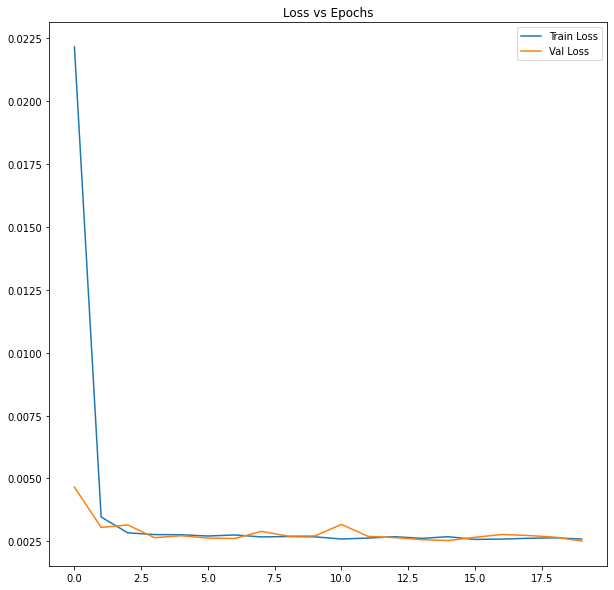

250/250 [==============================] - 2s 8ms/step - loss: 0.0024


0.0024457720573991537

In [ ]:
plot_learning_curves(rnn_history)
rnn_model.evaluate(X_train,y_train)

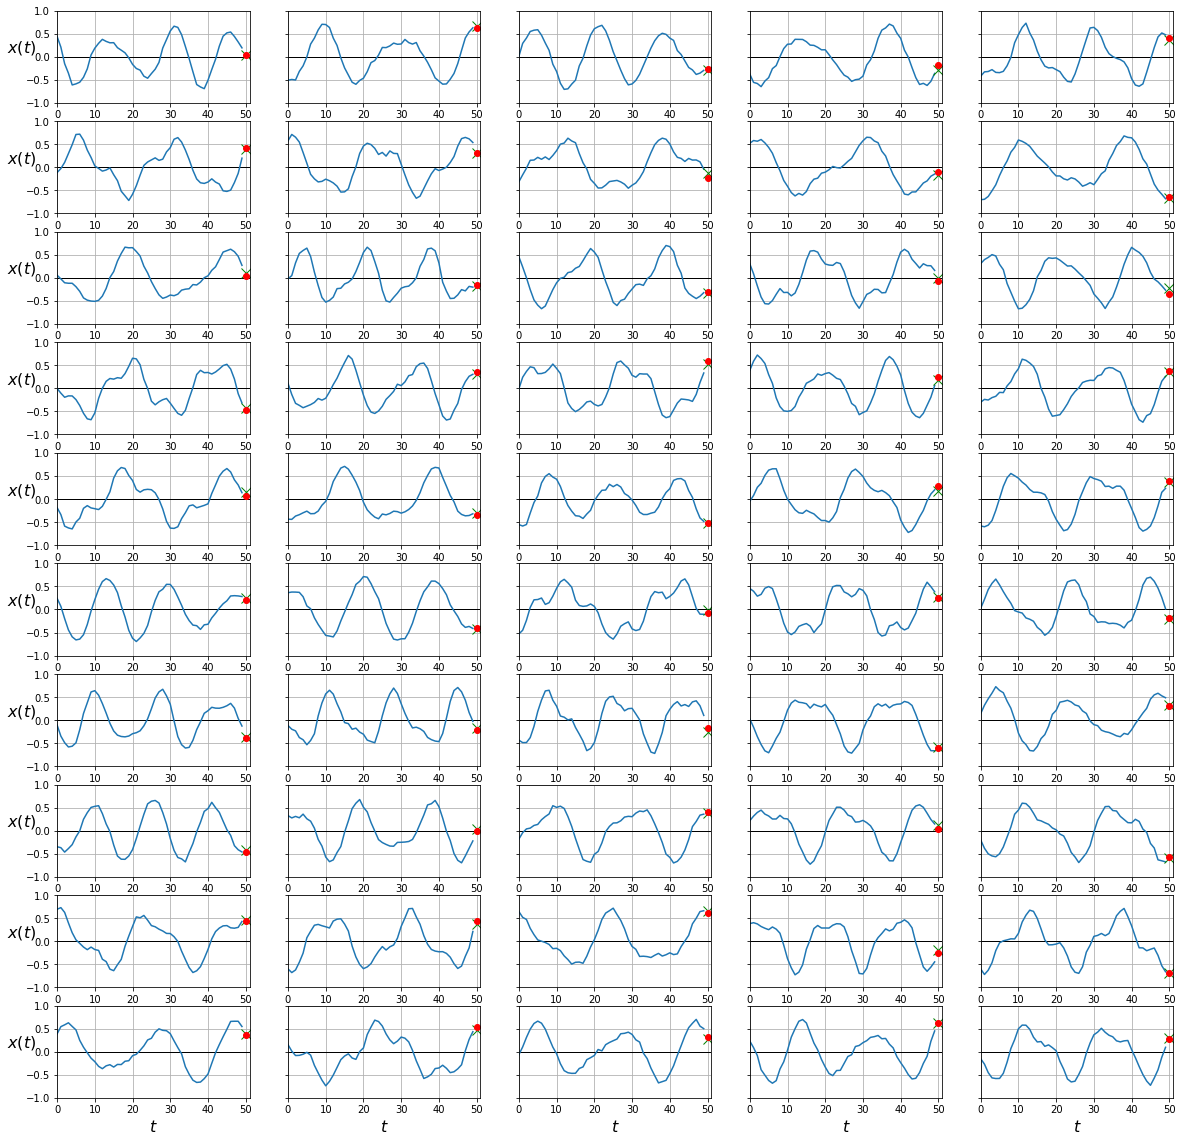

In [ ]:
y_pred = rnn_model.predict(X_test)
plot_all_series(10, 5, X_test, y_test, y_pred)

## 10 Steps Ahead

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = create_data_set(10000, 50, 10, 1000)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(8000, 50, 1) (8000, 10, 1)
(1000, 50, 1) (1000, 10, 1)
(1000, 50, 1) (1000, 10, 1)


### Visualize Series

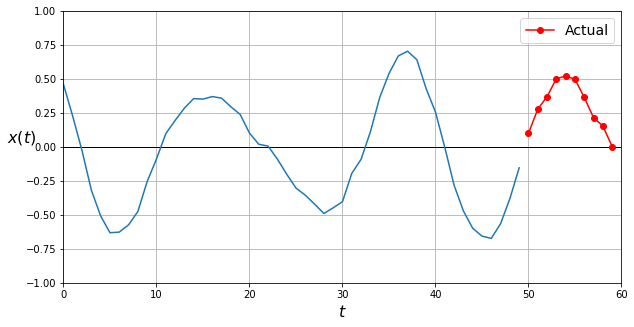

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred=None):
  plt.figure(figsize=(10,5))
  n_steps = X.shape[1]
  ahead = Y.shape[1]
  plot_series(X[0, :, 0], 50)
  plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
  if Y_pred is not None:
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :], "bx-", label="Forecast", markersize=10)
  plt.axis([0, n_steps + ahead, -1, 1])
  plt.legend(fontsize=14)
  plt.show()

plot_multiple_forecasts(X_test, Y_test)

## Predict 10 values at each time step

### Deep RNN

**TODOs**
1. Implement and train RNN model 
1. Plot Learning Curve
2. Evaluate on Test Set
1. Make a prediction
1. Call plot_multiple_forecasts()

In [ ]:
model = Sequential()
model.add(SimpleRNN(100,return_sequences=True, input_shape=X_train.shape[1:]))
model.add(SimpleRNN(100))
model.add(Dense(10))
print(model.summary())
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_24 (SimpleRNN)    (None, 50, 100)           10200     
_________________________________________________________________
simple_rnn_25 (SimpleRNN)    (None, 100)               20100     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 31,310
Trainable params: 31,310
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
250/250 [==============================] - 10s 41ms/step - loss: 0.0263 - val_loss: 0.0116
Epoch 2/20
250/250 [==============================] - 10s 41ms/step - loss: 0.0123 - val_loss: 0.0109
Epoch 3/20
250/250 [==============================] - 10s 41ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 4/20
250/250 [==============================] - 10s 41ms/step 

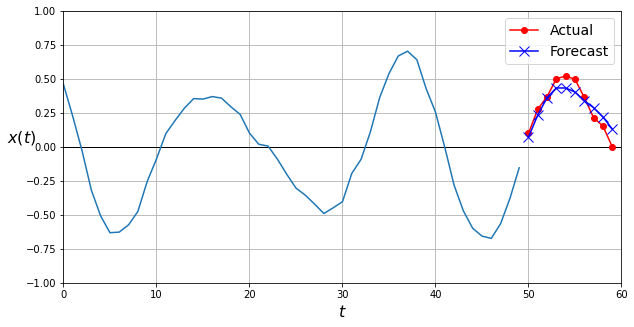

In [ ]:
Y_pred = model.predict(X_test)
plot_multiple_forecasts(X_test, Y_test, Y_pred)

### LSTM

In [ ]:
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:8000, :n_steps]
X_val = series[8000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:8000]
Y_val = Y[8000:9000]
Y_test = Y[9000:]

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(8000, 50, 1) (8000, 50, 10)
(1000, 50, 1) (1000, 50, 10)
(1000, 50, 1) (1000, 50, 10)


In [ ]:
#RNN


In [ ]:
# TODO
# 1. Create and train LSTM model
model = Sequential()
model.add(LSTM(50,input_shape = X_train.shape[1:],return_sequences= True))
model.add(LSTM(50,return_sequences=True))
model.add(Dense(10))
model.summary()
model.compile(loss = 'mse',optimizer='adam')
history = model.fit(X_train,Y_train,epochs = 20, verbose = 1, validation_data=(X_val,Y_val))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dense_20 (Dense)             (None, 50, 10)            510       
Total params: 31,110
Trainable params: 31,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
250/250 [==============================] - 2s 10ms/step - loss: 0.0623 - val_loss: 0.0389
Epoch 2/20
250/250 [==============================] - 2s 8ms/step - loss: 0.0345 - val_loss: 0.0318
Epoch 3/20
250/250 [==============================] - 2s 7ms/step - loss: 0.0301 - val_loss: 0.0288
Epoch 4/20
250/250 [==============================] - 2s 7ms/step - loss: 0.02

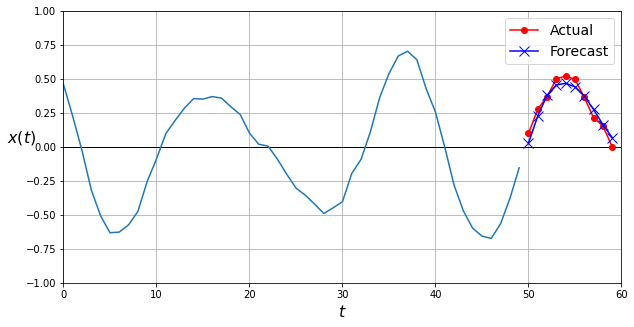

In [ ]:
Y_pred = model.predict(X_test)[:, -1][...,None]
Y_true = Y_test[:,-1][...,None]
plot_multiple_forecasts(X_test, Y_true, Y_pred)